In [1]:
!/bin/bash ./setup.sh

SageMaker instance route table setup is ok. We are good to go.
SageMaker instance routing for Docker is ok. We are good to go!


In [2]:
import os
import sagemaker
from sagemaker import get_execution_role
import pandas as pd
import numpy as np

sagemaker_session = sagemaker.Session()

role = get_execution_role()
region = sagemaker_session.boto_session.region_name

In [3]:
# Specify your bucket name
bucket_name = 'tellisa-collage-gan'

training_folder = r'collage_gan/train'
test_folder = r'collage_gan/test'
model_folder = r'collage_gan/model/'

training_data_uri = r's3://' + bucket_name + r'/' + training_folder
testing_data_uri = r's3://' + bucket_name + r'/' + test_folder
model_data_uri = r's3://' + bucket_name + r'/' + model_folder

In [4]:
!pygmentize 'GAN_Script.py'

import argparse
import os 
import pandas as pd
import json

#import keras
#from keras.models import Sequential
#from keras.layers import Reshape
#from keras.layers import Flatten
#from keras.layers import Conv2D, Dense, Conv2DTranspose
#from keras.layers import Dropout
#from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
import boto3
from boto3 import Session

session = Session()
credentials = session.get_credentials()

#aws access credentials
current_credentials = credentials.get_frozen_credentials()





def model(args, x_train,client):
    
    adam = Adam(learning_rate=0.0002)
    # Function for Generator
    def build_generator():
        model = tf.keras.models.Sequential()

        # Layer 1
        model.add(tf.keras.layers.Dense(256 * 16* 16, input_dim=args.latent_dim)) # 128/2/2/2 because 3 conv2d layers?
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras

In [5]:
from sagemaker.tensorflow import TensorFlow

In [6]:
#instance_type='ml.m5.xlarge'
instance_type='local'

In [7]:
hyperparameters = dict(
    batch_size=3,
    epochs=20
    
)

In [8]:
estimator = TensorFlow(entry_point='GAN_Script.py',
                       role=role,
                       instance_count=1,
                       instance_type=instance_type,
                       framework_version='2.1.0',
                       py_version='py3',
                       output_path=model_data_uri,
                       base_job_name='tf-collage-gan',
                       hyperparameters=hyperparameters,
                       distribution={'parameter_server': {'enabled': False}})

In [9]:
estimator.fit({'training':training_data_uri,'testing':testing_data_uri})

Creating mwp5dlu60e-algo-1-8alw0 ... 
Creating mwp5dlu60e-algo-1-8alw0 ... done
Attaching to mwp5dlu60e-algo-1-8alw0
mwp5dlu60e-algo-1-8alw0 | 2022-11-20 03:50:27,429 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
mwp5dlu60e-algo-1-8alw0 | 2022-11-20 03:50:27,438 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
mwp5dlu60e-algo-1-8alw0 | 2022-11-20 03:50:27,657 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
mwp5dlu60e-algo-1-8alw0 | 2022-11-20 03:50:27,676 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
mwp5dlu60e-algo-1-8alw0 | 2022-11-20 03:50:27,695 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
mwp5dlu60e-algo-1-8alw0 | 2022-11-20 03:50:27,706 sagemaker-containers INFO     Invoking user script
mwp5dlu60e-algo-1-8alw0 | 
mwp5dlu60e-algo-1-8alw0 | Training Env:
mwp5dlu60e-algo-1-8alw0 | 
mwp5dlu60e-algo-1-8alw0 | {
mwp5dlu60e-al

mwp5dlu60e-algo-1-8alw0 | [ 6 19  3]
mwp5dlu60e-algo-1-8alw0 | ******* 0 0 [D loss: 0.710492, acc: 0.00%] [G loss: 0.751979]
mwp5dlu60e-algo-1-8alw0 | [ 0 18  8]
mwp5dlu60e-algo-1-8alw0 | ******* 0 1 [D loss: 0.280962, acc: 100.00%] [G loss: 1.047482]
mwp5dlu60e-algo-1-8alw0 | [18  7 13]
mwp5dlu60e-algo-1-8alw0 | ******* 0 2 [D loss: 0.160454, acc: 100.00%] [G loss: 1.758858]
mwp5dlu60e-algo-1-8alw0 | [ 2  6 17]
mwp5dlu60e-algo-1-8alw0 | ******* 0 3 [D loss: 0.066598, acc: 100.00%] [G loss: 2.840775]
mwp5dlu60e-algo-1-8alw0 | [ 7 18 14]
mwp5dlu60e-algo-1-8alw0 | ******* 0 4 [D loss: 0.015080, acc: 100.00%] [G loss: 4.433642]
mwp5dlu60e-algo-1-8alw0 | [11 12  7]
mwp5dlu60e-algo-1-8alw0 | ******* 0 5 [D loss: 0.002540, acc: 100.00%] [G loss: 6.314566]
mwp5dlu60e-algo-1-8alw0 | [ 9 16 10]
mwp5dlu60e-algo-1-8alw0 | ******* 1 0 [D loss: 0.000363, acc: 100.00%] [G loss: 8.274831]
mwp5dlu60e-algo-1-8alw0 | [7 1 8]
mwp5dlu60e-algo-1-8alw0 | ******* 1 1 [D loss: 0.000056, acc: 100.00%] [G loss:

mwp5dlu60e-algo-1-8alw0 | ******* 9 3 [D loss: 0.891652, acc: 83.33%] [G loss: 50.152832]
mwp5dlu60e-algo-1-8alw0 | [ 4  9 15]
mwp5dlu60e-algo-1-8alw0 | ******* 9 4 [D loss: 0.000000, acc: 100.00%] [G loss: 43.508297]
mwp5dlu60e-algo-1-8alw0 | [19  0 10]
mwp5dlu60e-algo-1-8alw0 | ******* 9 5 [D loss: 0.000000, acc: 100.00%] [G loss: 31.906107]
mwp5dlu60e-algo-1-8alw0 | [15  9 12]
mwp5dlu60e-algo-1-8alw0 | ******* 10 0 [D loss: 0.000000, acc: 100.00%] [G loss: 21.565872]
mwp5dlu60e-algo-1-8alw0 | [ 3 19  1]
mwp5dlu60e-algo-1-8alw0 | ******* 10 1 [D loss: 2.970226, acc: 83.33%] [G loss: 16.391422]
mwp5dlu60e-algo-1-8alw0 | [11  2 17]
mwp5dlu60e-algo-1-8alw0 | ******* 10 2 [D loss: 1.169446, acc: 83.33%] [G loss: 13.154811]
mwp5dlu60e-algo-1-8alw0 | [1 5 8]
mwp5dlu60e-algo-1-8alw0 | ******* 10 3 [D loss: 1.595099, acc: 50.00%] [G loss: 22.316559]
mwp5dlu60e-algo-1-8alw0 | [17  6 11]
mwp5dlu60e-algo-1-8alw0 | ******* 10 4 [D loss: 0.000000, acc: 100.00%] [G loss: 30.040024]
mwp5dlu60e-algo

mwp5dlu60e-algo-1-8alw0 | [17 19  0]
mwp5dlu60e-algo-1-8alw0 | ******* 19 0 [D loss: 0.130906, acc: 100.00%] [G loss: 16.058611]
mwp5dlu60e-algo-1-8alw0 | [ 4  7 16]
mwp5dlu60e-algo-1-8alw0 | ******* 19 1 [D loss: 0.438559, acc: 83.33%] [G loss: 16.624664]
mwp5dlu60e-algo-1-8alw0 | [6 3 4]
mwp5dlu60e-algo-1-8alw0 | ******* 19 2 [D loss: 1.760124, acc: 83.33%] [G loss: 14.330281]
mwp5dlu60e-algo-1-8alw0 | [ 1 13  4]
mwp5dlu60e-algo-1-8alw0 | ******* 19 3 [D loss: 0.000068, acc: 100.00%] [G loss: 18.656040]
mwp5dlu60e-algo-1-8alw0 | [11  3 17]
mwp5dlu60e-algo-1-8alw0 | ******* 19 4 [D loss: 0.991796, acc: 50.00%] [G loss: 6.017031]
mwp5dlu60e-algo-1-8alw0 | [14  9  6]
mwp5dlu60e-algo-1-8alw0 | ******* 19 5 [D loss: 0.103878, acc: 100.00%] [G loss: 7.474161]
mwp5dlu60e-algo-1-8alw0 | 2022-11-20 04:00:20.668702: W tensorflow/python/util/util.cc:319] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
mwp5dlu60e-algo-1-8alw0 | WAR

In [10]:
predictor = estimator.deploy(initial_instance_count=1, instance_type=instance_type)

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Attaching to e42ae77o29-algo-1-bm39s
e42ae77o29-algo-1-bm39s | INFO:__main__:starting services
e42ae77o29-algo-1-bm39s | INFO:__main__:using default model name: model
e42ae77o29-algo-1-bm39s | INFO:__main__:tensorflow serving model config: 
e42ae77o29-algo-1-bm39s | model_config_list: {
e42ae77o29-algo-1-bm39s |   config: {
e42ae77o29-algo-1-bm39s |     name: "model",
e42ae77o29-algo-1-bm39s |     base_path: "/opt/ml/model",
e42ae77o29-algo-1-bm39s |     model_platform: "tensorflow"
e42ae77o29-algo-1-bm39s |   }
e42ae77o29-algo-1-bm39s | }
e42ae77o29-algo-1-bm39s | 
e42ae77o29-algo-1-bm39s | 
e42ae77o29-algo-1-bm39s | INFO:__main__:nginx config: 
e42ae77o29-algo-1-bm39s | load_module modules/ngx_http_js_module.so;
e42ae77o29-algo-1-bm39s | 
e42ae77o29-algo-1-bm39s | worker_processes auto;
e42ae77o29-algo-1-bm39s | daemon off;
e42ae77o29-algo-1-bm39s | pid /tmp/nginx.pid;
e42ae77o29-algo-1-bm39s | error_log  /dev/stderr info;
e42ae77o29-algo-1-bm39s | 
e42ae77o29-algo-1-bm39s | worker_r

e42ae77o29-algo-1-bm39s | 2022-11-20 04:00:26.975010: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:333] SavedModel load for tags { serve }; Status: success: OK. Took 164566 microseconds.
e42ae77o29-algo-1-bm39s | 2022-11-20 04:00:26.977303: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /opt/ml/model/000000001/assets.extra/tf_serving_warmup_requests
e42ae77o29-algo-1-bm39s | 2022-11-20 04:00:26.979150: I tensorflow_serving/util/retrier.cc:46] Retrying of Loading servable: {name: model version: 1} exhausted max_num_retries: 0
e42ae77o29-algo-1-bm39s | 2022-11-20 04:00:26.979176: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: model version: 1}
e42ae77o29-algo-1-bm39s | 2022-11-20 04:00:26.981716: I tensorflow_serving/model_servers/server.cc:362] Running gRPC ModelServer at 0.0.0.0:9000 ...
e42ae77o29-algo-1-bm39s | [warn] getaddrinfo: address family for nodename not supported


In [11]:
import numpy as np
noise = np.random.normal(0, 1, (1, 100))

In [12]:
result = predictor.predict(noise)

e42ae77o29-algo-1-bm39s | 2022/11/20 04:00:30 [warn] 15#15: *3 an upstream response is buffered to a temporary file /var/cache/nginx/proxy_temp/1/00/0000000001 while reading upstream, client: 172.18.0.1, server: , request: "POST /invocations HTTP/1.1", subrequest: "/v1/models/model:predict", upstream: "http://127.0.0.1:8501/v1/models/model:predict", host: "localhost:8080"
e42ae77o29-algo-1-bm39s | 172.18.0.1 - - [20/Nov/2022:04:00:30 +0000] "POST /invocations HTTP/1.1" 200 672858 "-" "python-urllib3/1.26.8"
e42ae77o29-algo-1-bm39s | 2022/11/20 04:00:30 [info] 15#15: *1 client 172.18.0.1 closed keepalive connection


In [13]:
img=np.array(result['predictions']).reshape(128,128,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


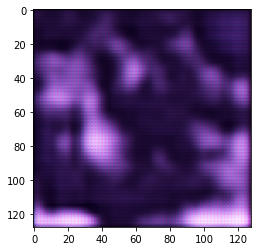

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [15]:
predictor.delete_endpoint()

Gracefully stopping... (press Ctrl+C again to force)


In [16]:
import boto3
import tensorflow as tf


s3 = boto3.resource('s3')


s3.meta.client.download_file("tellisa-collage-gan",'my_generator.h5', '/tmp/my_generator.h5')
gen = tf.keras.models.load_model('/tmp/my_generator.h5', compile=False)

2022-11-20 04:00:43.908671: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-20 04:00:43.908736: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-81-69.us-east-2.compute.internal): /proc/driver/nvidia/version does not exist
2022-11-20 04:00:43.909328: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
result = gen.predict(noise)

In [18]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


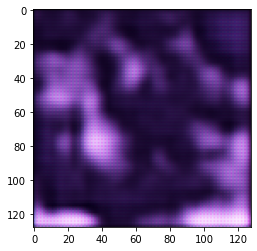

In [24]:
plt.imshow(result.reshape(128,128,3))